In [1]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/Users/dariaberezovska/ecal_rec2/ecal_reco/tracking')
import track_reconstruction as tr
# def merger(Array_of_paths):
#     br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']   
#     df_general = pd.DataFrame(columns = br_list_data)
#     for element in Array_of_paths:
#         Tname = 'board_57'
#         # Extract the data and transform it into a dataframe
#         with uproot.open(element) as tree:
#             dict_ecal = tree[Tname].arrays(br_list_data, library="np")
#         ## REALLY IMPORTANT, THE TIME CALIBRATION MUST BE DONE USIGN THE SAME DATAFRAME AS THE ONE USED TO RECONSTRUCT THE TRACK

#         df = pd.DataFrame.from_dict(dict_ecal).query('n_hits>6')
#         df['path_id'] = element
#         df=df.query('n_hits<18')
#         #print(df)
#         df_general=df_general.append(df)
#     print(df_general)
#     return df_general
## THUS FAR WE HAVE OPENED AND CREATED A GENERIC DATAFRAME ##





In [2]:
file_path = '/Users/dariaberezovska/!TP4a/test_tracking/10h/data_0000.root' ## later, one can use concatenation of data_0001.root - data_0008.root files as well. One is enough for testing

hits_tree = 'board_57'
evt_tree = 'event'
# br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']
br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp', 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value']
br_list_evt = ['timestamp', 'evt_number', 'flags']
with uproot.open(file_path) as tree:
    hits_dict = tree[hits_tree].arrays(br_list_data, library="np")
    evts_dict = tree[evt_tree].arrays(br_list_evt, library="np")
    
# df_hits = pd.DataFrame.from_dict(hits_dict).query('n_hits > 3')
df_hits = pd.DataFrame.from_dict(hits_dict)
df_evts = pd.DataFrame.from_dict(evts_dict)




In [3]:
df_hits['timestamp_global'] = df_evts['timestamp']
df_hits.query('n_hits > 2', inplace=True)

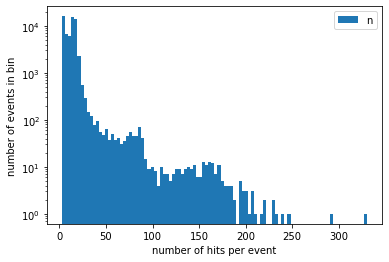

In [4]:
# basic histogram
hits_table=df_hits['n_hits'].to_numpy()
hits_table_cut=hits_table[hits_table>2]
plt.hist(hits_table_cut,bins = 100,log = True)
plt.xlabel('number of hits per event')
plt.ylabel('number of events in bin')
plt.legend('n')